# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.042267e+01     8.404823e+00
 * time: 0.0020520687103271484
     1     2.238439e+01     3.805605e+00
 * time: 0.009412050247192383
     2     1.498140e+01     2.541849e+00
 * time: 0.016423940658569336
     3     1.101104e+01     1.366789e+00
 * time: 0.02321600914001465
     4     1.045457e+01     2.255901e+00
 * time: 0.02875995635986328
     5     9.848583e+00     1.271431e+00
 * time: 0.034364938735961914
     6     9.287202e+00     1.036098e+00
 * time: 0.039884090423583984
     7     8.888062e+00     9.935005e-01
 * time: 0.04618096351623535
     8     8.575775e+00     8.092182e-01
 * time: 0.052195072174072266
     9     8.302815e+00     6.225448e-01
 * time: 0.05800294876098633
    10     8.109735e+00     3.986204e-01
 * time: 0.06385493278503418
    11     8.011606e+00     4.338939e-01
 * time: 0.06957697868347168
    12     7.934222e+00     3.544835e-01
 * time: 0.07560396194458008
    13     7.860397e+00     2.917510e-01
 

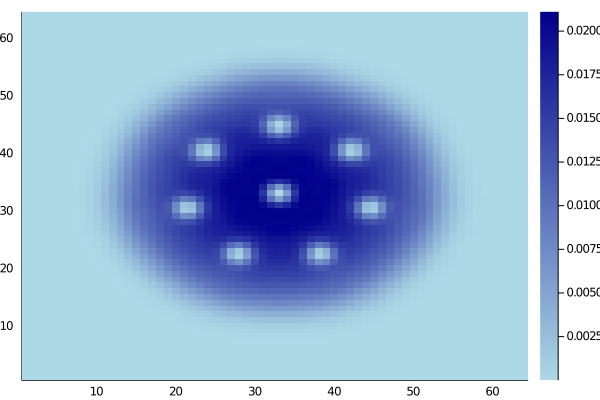

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)